In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [209]:
oportunidades = pd.read_csv('Entrenamiento_ECI_2020.csv')
oportunidades['Account_Created_Date'] = pd.to_datetime(oportunidades['Account_Created_Date'])
oportunidades['Opportunity_Created_Date'] = pd.to_datetime(oportunidades['Opportunity_Created_Date'])
oportunidades['Quote_Expiry_Date'] = pd.to_datetime(oportunidades['Quote_Expiry_Date'])
oportunidades['Last_Modified_Date'] = pd.to_datetime(oportunidades['Last_Modified_Date'])
oportunidades['Planned_Delivery_Start_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_Start_Date'])
oportunidades['Planned_Delivery_End_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_End_Date'])
oportunidades.head(5)
oportunidades['Region'] = oportunidades['Region'].replace({'Japan':'APAC', 'Middle East':'EMEA'})
oportunidades['Region'].value_counts()


APAC        8154
EMEA        4848
Americas    3945
Name: Region, dtype: int64

In [210]:
oportunidades_EMEA = oportunidades[oportunidades['Region'] == 'EMEA']
oportunidades_EMEA_cerradas = oportunidades_EMEA[['Stage', 'Planned_Delivery_End_Date','Account_Created_Date','Opportunity_Created_Date']]
oportunidades_EMEA_cerradas['Opportunity_Created_Date'].values
year = np.array(oportunidades_EMEA_cerradas['Opportunity_Created_Date'], dtype=np.datetime64)
year = pd.to_datetime(year).year
oportunidades_EMEA_cerradas['Opportunity_Created_Year'] = year
oportunidades_EMEA_cerradas['Opportunity_Created_Year'].value_counts()

2017    1983
2018    1544
2016    1118
2015     198
2014       4
2013       1
Name: Opportunity_Created_Year, dtype: int64

In [211]:
oportunidades_por_anio = oportunidades_EMEA_cerradas.groupby('Opportunity_Created_Year').agg({'Stage':'value_counts'})
oportunidades_por_anio = oportunidades_por_anio.unstack().reset_index()
oportunidades_por_anio 
level_0 = oportunidades_por_anio.columns.get_level_values(0)
level_menos1 = oportunidades_por_anio.columns.get_level_values(-1)
oportunidades_por_anio.columns = level_0 + '_' + level_menos1
oportunidades_por_anio = oportunidades_por_anio[['Opportunity_Created_Year_','Stage_Closed Lost','Stage_Closed Won']]

oportunidades_por_anio





,Opportunity_Created_Year_,Stage_Closed Lost,Stage_Closed Won
0,2013,1.0,NaN
1,2014,3.0,1.0
2,2015,125.0,73.0
3,2016,652.0,466.0
4,2017,789.0,1193.0
5,2018,739.0,788.0


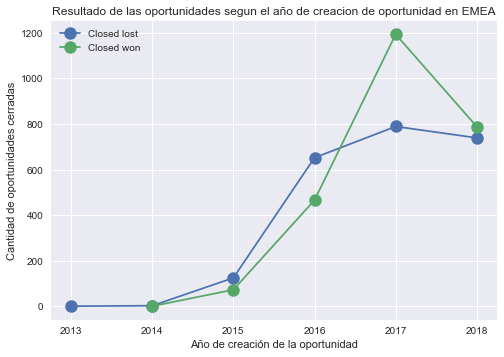

In [212]:

plt.plot(oportunidades_por_anio['Opportunity_Created_Year_'],oportunidades_por_anio['Stage_Closed Lost'], label = 'Closed lost', marker = '.', markersize = 25)
plt.plot(oportunidades_por_anio['Opportunity_Created_Year_'],oportunidades_por_anio['Stage_Closed Won'], label = 'Closed won',marker = '.', markersize = 25)
plt.title('Resultado de las oportunidades segun el año de creacion de oportunidad en EMEA')
plt.xlabel('Año de creación de la oportunidad')
plt.ylabel('Cantidad de oportunidades cerradas')
plt.legend()
plt.show()

In [213]:

oportunidades_APAC = oportunidades[oportunidades['Region'] == 'APAC']

oportunidades_APAC_cerradas = oportunidades_APAC[['Stage', 'Planned_Delivery_End_Date','Account_Created_Date','Opportunity_Created_Date']] 
oportunidades_APAC_cerradas['Opportunity_Created_Date'].values
year = np.array(oportunidades_APAC_cerradas['Opportunity_Created_Date'], dtype=np.datetime64)
year = pd.to_datetime(year).year
oportunidades_APAC_cerradas['Opportunity_Created_Year'] = year
oportunidades_APAC_cerradas['Opportunity_Created_Year'].value_counts()




2017    3233
2016    2530
2018    1821
2015     557
2014      13
Name: Opportunity_Created_Year, dtype: int64

In [214]:
oportunidades_por_anio = oportunidades_APAC_cerradas.groupby('Opportunity_Created_Year').agg({'Stage':'value_counts'})
oportunidades_por_anio = oportunidades_por_anio.unstack().reset_index()
oportunidades_por_anio 
level_0 = oportunidades_por_anio.columns.get_level_values(0)
level_menos1 = oportunidades_por_anio.columns.get_level_values(-1)
oportunidades_por_anio.columns = level_0 + '_' + level_menos1
oportunidades_por_anio = oportunidades_por_anio[['Opportunity_Created_Year_','Stage_Closed Lost','Stage_Closed Won']]

oportunidades_por_anio




,Opportunity_Created_Year_,Stage_Closed Lost,Stage_Closed Won
0,2014,12.0,1.0
1,2015,411.0,146.0
2,2016,1161.0,1369.0
3,2017,816.0,2417.0
4,2018,501.0,1286.0


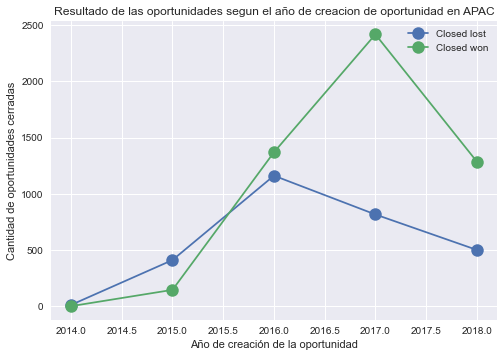

In [219]:
plt.plot(oportunidades_por_anio['Opportunity_Created_Year_'],oportunidades_por_anio['Stage_Closed Lost'], label = 'Closed lost', marker = '.', markersize = 25)
plt.plot(oportunidades_por_anio['Opportunity_Created_Year_'],oportunidades_por_anio['Stage_Closed Won'], label = 'Closed won',marker = '.', markersize = 25)
plt.title('Resultado de las oportunidades segun el año de creacion de oportunidad en APAC')
plt.xlabel('Año de creación de la oportunidad')
plt.ylabel('Cantidad de oportunidades cerradas')
#FIJARSE COMO CAMBIAR LA ESCALA 
plt.legend()
plt.show()

In [220]:
oportunidades_Americas = oportunidades[oportunidades['Region'] == 'Americas']
oportunidades_Americas_cerradas = oportunidades_Americas[['Stage', 'Planned_Delivery_End_Date','Account_Created_Date','Opportunity_Created_Date']]
oportunidades_Americas_cerradas['Opportunity_Created_Date'].values
year = np.array(oportunidades_Americas_cerradas['Opportunity_Created_Date'], dtype=np.datetime64)
year = pd.to_datetime(year).year
oportunidades_Americas_cerradas['Opportunity_Created_Year'] = year
oportunidades_Americas_cerradas['Opportunity_Created_Year'].value_counts()

2017    1705
2018    1253
2016     707
2015     257
2014      23
Name: Opportunity_Created_Year, dtype: int64

In [221]:
oportunidades_por_anio = oportunidades_Americas_cerradas.groupby('Opportunity_Created_Year').agg({'Stage':'value_counts'})
oportunidades_por_anio = oportunidades_por_anio.unstack().reset_index()
oportunidades_por_anio 
level_0 = oportunidades_por_anio.columns.get_level_values(0)
level_menos1 = oportunidades_por_anio.columns.get_level_values(-1)
oportunidades_por_anio.columns = level_0 + '_' + level_menos1
oportunidades_por_anio = oportunidades_por_anio[['Opportunity_Created_Year_','Stage_Closed Lost','Stage_Closed Won']]

oportunidades_por_anio

,Opportunity_Created_Year_,Stage_Closed Lost,Stage_Closed Won
0,2014,8.0,15.0
1,2015,200.0,57.0
2,2016,444.0,263.0
3,2017,946.0,759.0
4,2018,542.0,699.0


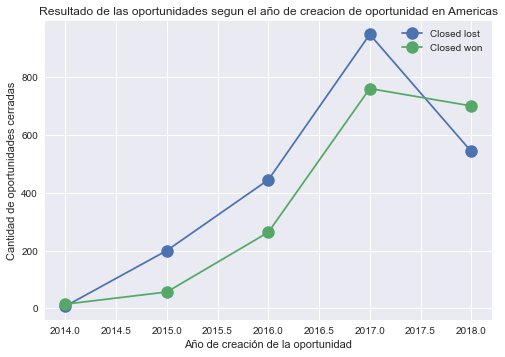

In [223]:
plt.plot(oportunidades_por_anio['Opportunity_Created_Year_'],oportunidades_por_anio['Stage_Closed Lost'], label = 'Closed lost', marker = '.', markersize = 25)
plt.plot(oportunidades_por_anio['Opportunity_Created_Year_'],oportunidades_por_anio['Stage_Closed Won'], label = 'Closed won',marker = '.', markersize = 25)
plt.title('Resultado de las oportunidades segun el año de creacion de oportunidad en Americas')
plt.xlabel('Año de creación de la oportunidad')
plt.ylabel('Cantidad de oportunidades cerradas')
plt.legend()
plt.show()